# Imports

In [42]:
import os  # Operating system interfaces
import tensorflow as tf                                    # TensorFlow deep learning framework
import matplotlib.pyplot as plt                            # Plotting library
import matplotlib.image as mpimg                           # Image loading and manipulation library
from tensorflow.keras.models import Sequential, Model      # Sequential and Functional API for building models
from tensorflow.keras.optimizers import Adam               # Adam optimizer for model training
from tensorflow.keras.callbacks import EarlyStopping       # Early stopping callback for model training
from tensorflow.keras.regularizers import l1, l2           # L1 and L2 regularization for model regularization
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data augmentation and preprocessing for images
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D, AveragePooling2D, MaxPooling2D, BatchNormalization  

# Various types of layers for building neural networks
from tensorflow.keras.applications import DenseNet121, EfficientNetB4, Xception, VGG16, VGG19   # Pre-trained models for transfer learning

# Loading the dataset

In [43]:
train_data = tf.keras.utils.image_dataset_from_directory(
    "../data/input/train/",
    labels="inferred",
    label_mode="categorical",
    image_size=(256, 256),
    batch_size=32)

train_data = train_data.map(lambda x, y: (x / 255.0, y)) # Normalize the images

Found 10000 files belonging to 10 classes.


In [44]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    "../data/input/val",
    labels="inferred",
    label_mode="categorical",
    image_size=(256, 256),
    batch_size=32)

val_data = val_data.map(lambda x, y: (x / 255.0, y)) # Normalize the images

Found 1000 files belonging to 10 classes.


# Load pretrained model `DenseNet121`

In [45]:
conv_base = DenseNet121(
    weights='imagenet',
    include_top = False,
    input_shape=(256,256,3),
    pooling='avg'
)

conv_base.trainable = False

In [46]:
conv_base.summary()

Model: "densenet121"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_2    │ (None, 262, 262,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,408 │ zero_padding2d_2… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_3    │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 64, 64,    │          0 │ zero_padding2d_3… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 64, 64,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 64, 64,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 64, 64,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 64, 64,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 64, 64,    │     12,288 │ conv2_block2_0_r

 Total params: 7,037,504 (26.85 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 7,037,504 (26.85 MB)

# `DenseNet121` combined with some `Dense` layers

In [47]:
model = Sequential()
model.add(conv_base) # adding the pre-trained model
model.add(BatchNormalization()) # Batch normalization layer
model.add(Dense(256, activation='relu')) # Dense layer with 256 neurons, ReLU activation
model.add(Dropout(0.35)) # This means that 35% of the neurons will be randomly turned off during each epoch
model.add(BatchNormalization())
model.add(Dense(120, activation='relu')) # Dense layer with 120 neurons, ReLU activation
model.add(Dense(10, activation='softmax')) # 10 classes (10 leaf diseases), softmax activation

In [48]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
history = model.fit(train_data, epochs=50, validation_data=val_data, callbacks=[EarlyStopping(patience=0)])

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 780s 2s/step - accuracy: 0.3359 - loss: 2.0095 - val_accuracy: 0.7620 - val_loss: 0.9022
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 878s 3s/step - accuracy: 0.7539 - loss: 0.7893 - val_accuracy: 0.8490 - val_loss: 0.5107
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 785s 3s/step - accuracy: 0.8292 - loss: 0.5407 - val_accuracy: 0.8870 - val_loss: 0.3881
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 767s 2s/step - accuracy: 0.8729 - loss: 0.4202 - val_accuracy: 0.9070 - val_loss: 0.3259
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 755s 2s/step - accuracy: 0.8900 - loss: 0.3419 - val_accuracy: 0.9150 - val_loss: 0.2837
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 715s 2s/step - accuracy: 0.9093 - loss: 0.2882 - val_accuracy: 0.9230 - val_loss: 0.2584
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 718s 2s/step - accuracy: 0.9232 - loss: 0.2475 - val_accuracy: 0.9310 - val_loss: 0.2422
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 694s 2s/step - accuracy: 0.9336 - loss: 0.2202 - val_accu

We have set an early stopping criteria, so if `loss` is no longer decreasing the `model.fit()` will stop

# Save the model

In [50]:
model.save("../models/model_pretrained_50.h5")

# Plot history

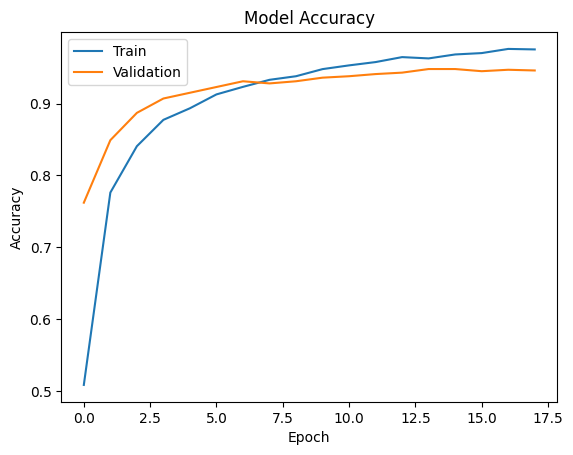

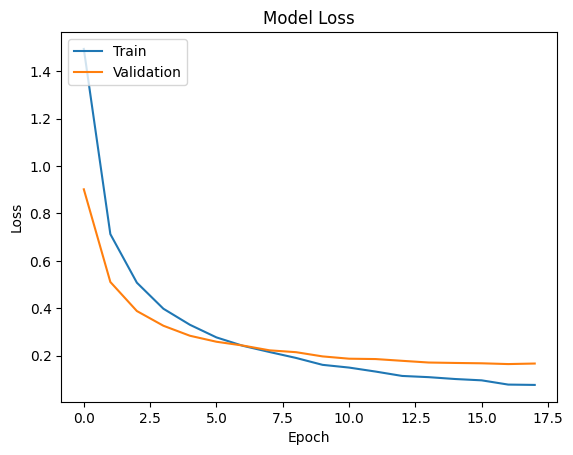

In [51]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Save the history to `csv`

In [52]:
import pandas as pd

df = pd.DataFrame(history.history)
df.to_csv("../data/output/pretrained_model_50.csv")

In [21]:
train_data = tf.keras.utils.image_dataset_from_directory(
    "../data/input/train/",
    labels="inferred",
    label_mode="categorical",
    image_size=(256, 256),
    batch_size=32)

classes = train_data.class_names

Found 10000 files belonging to 10 classes.


In [22]:
classes

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

# Evaluating the model

In [53]:
# Now we can use the model to make predictions on new images
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(val_data)
print("test loss, test acc:", results)

Evaluate on test data
32/32 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.9517 - loss: 0.1492
test loss, test acc: [0.16632652282714844, 0.9459999799728394]


# Conclusion

We have achieved a 0.95 accuracy on the test set with a 0.17 loss. This means we have obtained a rather good model, because the test accuracy is high and the train accuracy is close to the test accuracy, meaning there is no sign of overfitting.

`EarlyStop`